# Problem Statement 

Buying a new house is dream of many people.In recent years we have seen house prices increase. So its very important decision for any one to predict correct value of hosue. there are many factors that influence the potential price of a house, making it more complicated for an individual to decide how much a house is worth on their own without external help. This can lead to people making poorly informed decisions about whether to buy or sell their houses and which prices are reasonable. Because houses are long term investments, it is imperative that people make their decisions with the most accurate information possible.

<b> Business statment</b>

To solve this problem we have created a machine learning based on linear regression algorithm. In this we will use King County data-set taken from Kaggel to train our model.This will help you to predict future price of house based on 15 unique features .In this house price does not depend only on selling and purchasing price .In recent time locality ,area,numbers of bed-rooms ,luxury amenities are some new variable which affects price in upcoming future.

In [2]:
import numpy as np #linear algebra
import pandas as pd #datapreprocessing, CSV file I/O
import seaborn as sns #for plotting graphs
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import  LinearRegression

df = pd.read_csv("/home/jayesh/Downloads/wk3_kc_house_train_data.csv") #train data
df2=pd.read_csv("/home/jayesh/Downloads/wk3_kc_house_valid_data.csv")  # validation data
df3=pd.read_csv("/home/jayesh/Downloads/wk3_kc_house_test_data.csv")   #test data
df_con=pd.concat([df,df2]) #combining test and validation data 
df_con.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.939600e+04,1.939600e+04,19396.000000,19396.000000,19396.000000,1.939600e+04,19396.000000,19396.000000,19396.000000,19396.000000,19396.000000,19396.000000,19396.000000,19396.000000,19396.000000,19396.000000,19396.000000,19396.000000,19396.000000,19396.000000
mean,4.574839e+09,5.402533e+05,3.372809,2.116558,2080.638121,1.528440e+04,1.494097,0.007734,0.235100,3.409053,7.657868,1788.043153,292.594968,1971.000412,84.181842,98077.806352,47.560370,-122.213745,1986.629924,12839.396061
std,2.872690e+09,3.681178e+05,0.936973,0.771589,920.873571,4.255954e+04,0.539594,0.087602,0.767607,0.649055,1.178251,827.148014,444.655676,29.359066,401.204721,53.567612,0.138838,0.140835,685.322295,27762.285577
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,460.000000,651.000000
25%,2.124049e+09,3.220000e+05,3.000000,1.750000,1420.000000,5.055500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904921e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572400,-122.230000,1840.000000,7628.500000
75%,7.300410e+09,6.450000e+05,4.000000,2.500000,2560.000000,1.072000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,562.500000,1997.000000,0.000000,98118.000000,47.678400,-122.125000,2360.000000,10094.250000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6110.000000,871200.000000


In [3]:
df_con.isnull().values.any()


False

# EDA of data

The data set contains 21613 observations((including test data) (home sales in 2014-15) with 19 features plus house price. 

id
date: Date house was sold
price: Price of the sold house
bedrooms: Number of Bedrooms
bathrooms: Number of bathrooms
sqft_living: Square footage of the living space
sqrt_lot: Square footage of the lot
floors: Total floors in the house
waterfront: Whether the house is on a waterfront(1: yes, 0: no)
view: special view?
condition: Condition of the house
grade: unknown
sqft_above: Square footage of house apart from basement
sqft_basement: Square footage of the basement
yr_built: Built year
yr_renovated: Year when the house was renovated
zipcode: zipcode of the house
lat: Latitude coordinate
long Longitude coordinate
sqft_living15: Living room area in 2015(implies some renovations)
sqrt_lot15: Lot area in 2015(implies some renovations)

In below pairplot we have taken data which are continous in nature 

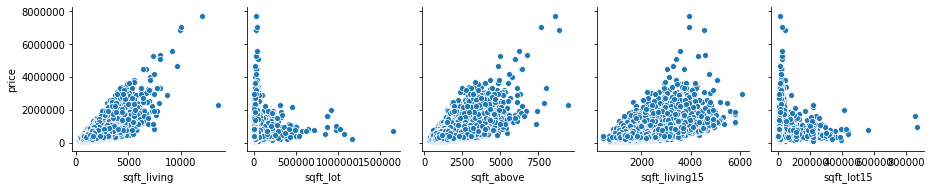

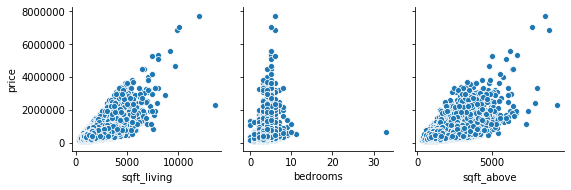

In [3]:

sns.pairplot(data=df_con, x_vars=['sqft_living','sqft_lot','sqft_above','sqft_living15','sqft_lot15'], y_vars=["price"])

sns.pairplot(data=df_con, x_vars=['sqft_living','bedrooms','sqft_above'], y_vars=["price"])

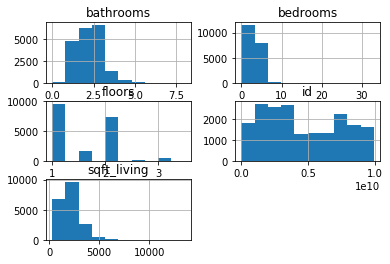

In [4]:
df_bar = df_con[['id','floors','sqft_living','bedrooms','bathrooms']]
viz = df_bar.hist()
plt.show()

<b>Visually the best feature to use looks like sqft_living .</b>

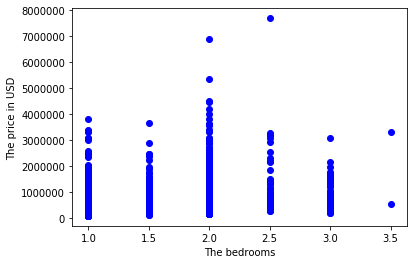

In [5]:
plt.scatter(df.floors, df.price,  color='blue')
plt.xlabel("The bedrooms")
plt.ylabel("The price in USD")
plt.show()

(array([6.712e+03, 2.752e+03, 2.740e+02, 2.000e+01, 3.000e+00]),
 array([ 290., 2004., 3718., 5432., 7146., 8860.]),
 <a list of 5 Patch objects>)

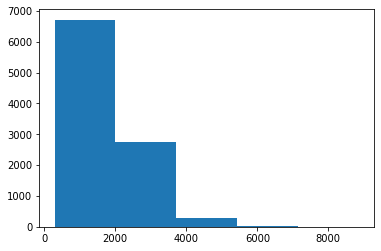

In [49]:
plt.hist('sqft_above',data=df,bins=5)

<b>A barplot is plotted between the sqft above and prices to see how the price changes with the sqft above.</b>

No handles with labels found to put in legend.


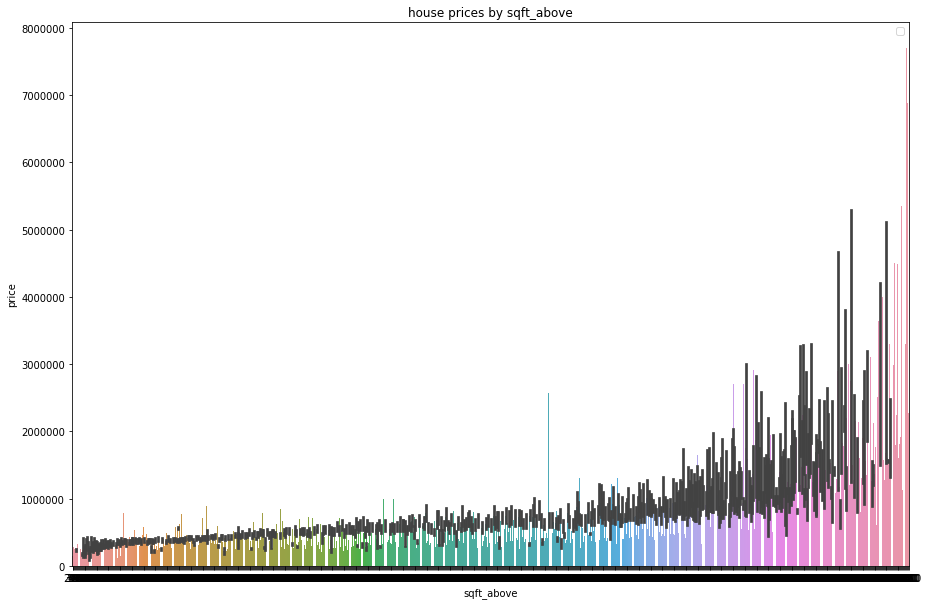

In [6]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title("house prices by sqft_above")
plt.xlabel('sqft_above')
plt.ylabel('prices')
plt.legend()
sns.barplot(x='sqft_above',y='price',data=df_con)

<b> A distplot is plotted for sqft living to see if the data is skewed or not </b>

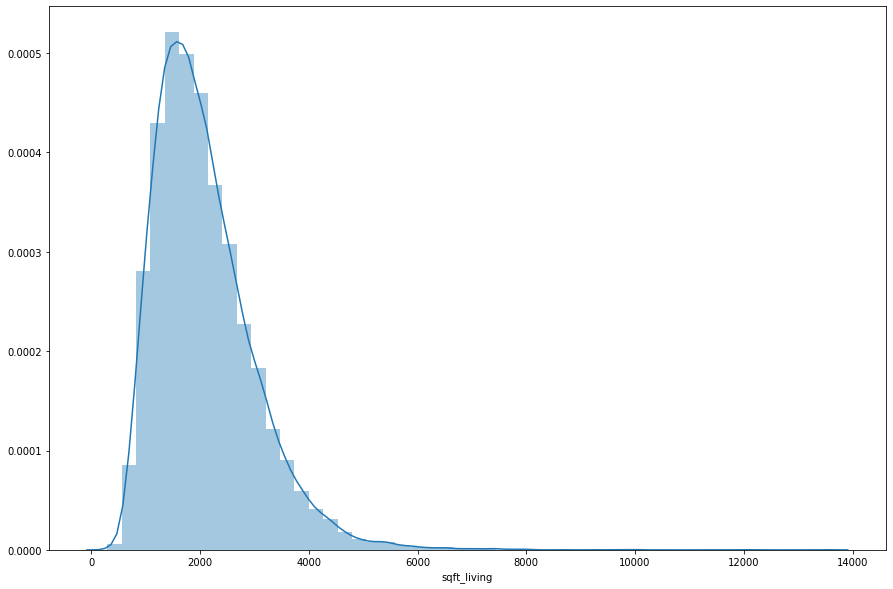

In [7]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
sns.distplot(df_con['sqft_living'],hist=True,kde=True,rug=False,label='sqft_living',norm_hist=True)

<b> Plot a correlation between all the features using a heatmap </b>

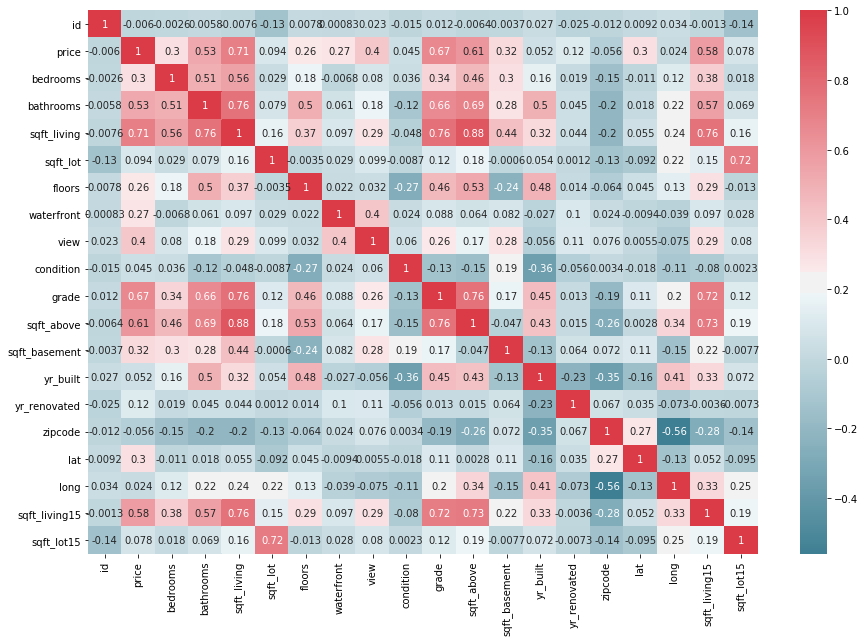

In [8]:
def correlation_heatmap(df_con):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df_con.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(df)

In [9]:
#y = df_con.price.values
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#dfle.bedrooms = le.fit_transform(dfle.bedrooms.values)
#dfle= df_con['sqft_living','bedrooms']
#dfk=pd.get_dummies(dfle['bedrooms'])
#dfle=pd.concat([dfle,dfk],axis=1)
#X1.shape
#from sklearn.preprocessing import OneHotEncoder
#ohe = OneHotEncoder(categorical_features=[0])
#X1 = ohe.fit_transform(X1).toarray()
#y.shape
#y=y.reshape((21613,1))
# importing one hot encoder from sklearn 
#from sklearn.preprocessing import OneHotEncoder 

# creating one hot encoder object with categorical feature 0 
# indicating the first column 
#onehotencoder = OneHotEncoder(categorical_features = [0]) 
#X1 = onehotencoder.fit_transform(dfle).toarray() 
#y = df_con[['price']].values
#y.shape

<b>In this we have combine all dataset for encoding and resluting data prodcue same size of test and train dataset.Replacing all nan value of price column with its mean </b>


In [4]:
df_tr=pd.concat([df,df2],sort=True) #df1 represent train data df2 represent validation data
df3['test']=0                        #df2 represent test dataframe  
df_tr['train']=1
combo=pd.concat([df_tr,df3],sort=True)
cm=combo['price'].mean()
combo['price'].fillna(int(cm), inplace = True)

cm

540088.1417665294

In [5]:
dfl=pd.get_dummies(combo['bedrooms'])
dfl2=pd.get_dummies(combo['zipcode'])
combo=pd.concat([combo,dfl,dfl2],axis=1)



<b> Spliting data set into test and train after encoding </b>

In [6]:
combo.loc[(combo.sqft_basement >1 ),'sqft_basement']=1
#converting basement into binary
#combo['sqft_basement'] = np.where((df.sqft_basement > 0),1,sqft_basement)
combo.sqft_basement
   

    



0       1
1       1
2       1
3       0
4       0
       ..
2212    0
2213    0
2214    1
2215    0
2216    1
Name: sqft_basement, Length: 21613, dtype: int64

In [7]:
combo['age']=2015-combo['yr_built']
df_train = combo[combo['train']==1]
df_test = combo[combo['test']==0]

y=np.log(df_train['price'])
#y=df_train['price']
df_train=df_train.drop(columns=['lat', 'long','date','id'])
df_train['sqft_living']=np.log(df_train['sqft_living'])
df_train['sqft_lot']=np.log(df_train['sqft_lot'])


In [8]:
df_train['sqft_lot15']=np.log(df_train['sqft_lot15'])
df_train['sqft_living15']=np.log(df_train['sqft_living15'])

In [9]:
#df_train['sqft_above']=np.log(df_train['sqft_above'])
X=df_train[['sqft_living','bedrooms','zipcode','condition','grade','floors','age','sqft_lot','view','waterfront','sqft_living15','sqft_lot15','sqft_above','sqft_basement']]
#X=df_train
df_train['sqft_above']

0       1050
1       3890
2        860
3       1430
4       1370
        ... 
9630    1500
9631    1180
9632    1530
9633    2310
9634    1600
Name: sqft_above, Length: 19396, dtype: int64

In [10]:
df_test['sqft_lot15']=np.log(df_test['sqft_lot15'])
df_test['sqft_living15']=np.log(df_test['sqft_living15'])

/home/jayesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jayesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
df_test['sqft_living']=np.log(df_test['sqft_living'])
df_test['sqft_lot']=np.log(df_test['sqft_lot'])



/home/jayesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jayesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [83]:
#df_test['sqft_above']=np.log(df_test['sqft_above'])

/home/jayesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
X_test=df_test[['sqft_living','bedrooms','zipcode','condition','grade','floors','age','sqft_lot','view','waterfront','sqft_living15','sqft_lot15','sqft_above','sqft_basement']]
y_test=np.log(df_test['price'])
#df_train['age']
df_test['age']

0        12
1       115
2        94
3        86
4        46
       ... 
2212      8
2213      5
2214      1
2215      1
2216      8
Name: age, Length: 2217, dtype: int64

<b> Spliting data for the cross validation taking ratio 80% train 20% validation </b>

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, 
                                                    y, 
                                                    shuffle=True,
                                                    test_size=0.2, 
                                                    random_state=15)

<h1>Calling regression model from Sklearn package</h1>

In [14]:
regr = LinearRegression() 
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test))
y_pred=regr.predict(X_test)
#print(model.score(X_test, y_test))

0.6383123220976864


<b> Cross validation We will use 5-fold cross-validation for our problem statement. The first line of code uses the 'model_selection.KFold' function from 'scikit-learn' and creates 10 folds </b>

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=5, random_state=15)
model_kfold =  LinearRegression()
results_kfold = model_selection.cross_val_score(model_kfold, X_valid, y_valid, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 66.81%


/home/jayesh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [22]:
mean_squared_error=sklearn.metrics.mean_squared_error(y_test,y_pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))

Sqaured mean error 0.32


In [47]:
from sklearn.metrics import r2_score
z=sklearn.metrics.r2_score(y_test, y_pred, sample_weight=None, multioutput='uniform_average')
z


0.6345428904334225

#  Comparing result of Linear regression and Regression tree

In [24]:
from sklearn.tree import DecisionTreeClassifier # for fitting classification tree
from sklearn.tree import DecisionTreeRegressor #for fitting regression tree
from sklearn.metrics import confusion_matrix # to create confusion matrix

In [25]:
model = DecisionTreeRegressor(max_depth=3,min_samples_leaf=5)
model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [26]:
y_pred1 = model.predict(X_test)
y_pred1

array([12.8332406 , 12.8332406 , 12.8332406 , ..., 13.05981553,
       13.05981553, 13.05981553])

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=5, random_state=15)
model_kfold =  DecisionTreeRegressor(max_depth=3,min_samples_leaf=5)
results_kfold = model_selection.cross_val_score(model_kfold, X_valid, y_valid, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 52.08%


/home/jayesh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [28]:
np.sqrt(np.mean((np.array(y_test)-y_pred1)**2)) #RMSE

0.3726033353652977

In [29]:
from sklearn.metrics import r2_score
z=sklearn.metrics.r2_score(y_test, y_pred1, sample_weight=None, multioutput='uniform_average')
z


0.5035086806253357